# Logistic Regression, SVM, Tree

### Titanic regression model

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

### Load Titanic dataset

In [29]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Handling missing values in 'age' column

In [30]:
median_age = math.floor(titanic.age.median())
titanic.age = titanic.age.fillna(median_age)
median_age

28

### Splitting the dataset into training and testing sets

In [31]:
np.random.seed(42)
indices = np.random.permutation(titanic.shape[0])
train_size = int(0.6 * titanic.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = titanic.iloc[train_indices][["fare"]]
y_train = titanic.iloc[train_indices]["survived"]
X_test = titanic.iloc[test_indices][["fare"]]
y_test = titanic.iloc[test_indices]["survived"]

print(X_train)

        fare
709  15.2458
439  10.5000
840   7.9250
720  33.0000
39   11.2417
..       ...
175   7.8542
245  90.0000
740  30.0000
602  42.4000
768  24.1500

[534 rows x 1 columns]


### Logistic Regression

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def train_logistic_regression(X_train, y_train, lr=0.01, num_iter=1000):
    m, n = X_train.shape
    intercept = np.ones((m, 1))
    X_train = np.concatenate((intercept, X_train), axis=1)
    theta = np.zeros(n + 1)

    for _ in range(num_iter):
        z = np.dot(X_train, theta)
        h = sigmoid(z)
        gradient = np.dot(X_train.T, (h - y_train)) / m
        theta -= lr * gradient

    return theta

In [33]:
theta = train_logistic_regression(X_train.values, y_train.values)
theta

array([-1.07138231,  0.01729916])

### Predict function

In [34]:
def predict(X, theta):
    m = X.shape[0]
    intercept = np.ones((m, 1))
    X = np.concatenate((intercept, X), axis=1)
    y_pred = sigmoid(np.dot(X, theta))
    return np.round(y_pred)

### Making predictions on the training set

In [35]:
y_train_pred = predict(X_train.values, theta)

### Visualization


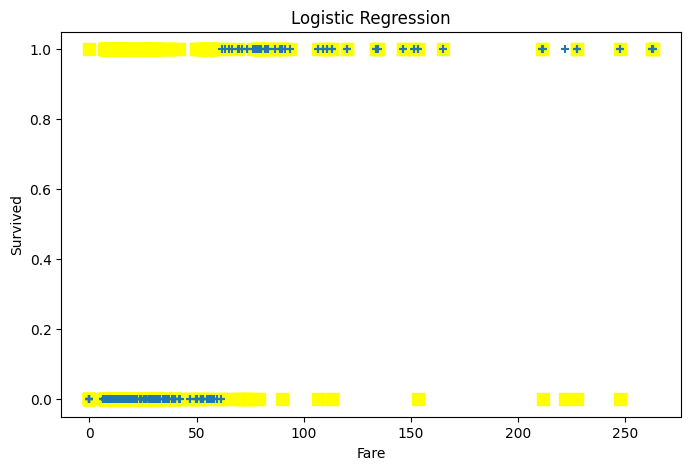

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, marker="s", s=80, c="yellow")
plt.scatter(X_train, y_train_pred, marker="+")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Logistic Regression")
plt.show()

### Making predictions on the testing set

In [37]:
y_test_pred = predict(X_test.values, theta)

### Confusion Matrix

In [38]:
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])


cm = confusion_matrix(y_test.values, y_test_pred)

### Plotting confusion matrix

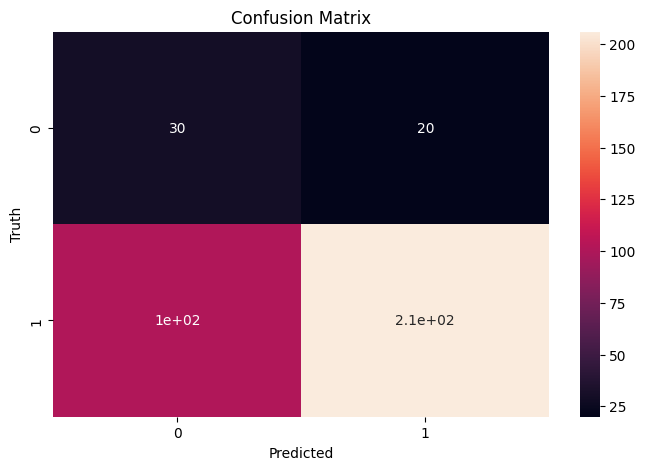

In [39]:
plt.figure(figsize=(8, 5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [40]:
def classification_report(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    return {"precision": precision, "recall": recall, "f1-score": f1_score}


report = classification_report(y_test.values, y_test_pred)
print("Classification Report : ")
print("Precision:", report["precision"])
print("Recall:", report["recall"])
print("F1-Score:", report["f1-score"])

Classification Report : 
Precision: 0.6
Recall: 0.22900763358778625
F1-Score: 0.33149171270718225


# SVM


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


titanic = sns.load_dataset("titanic")
median = np.floor(titanic.age.median())
titanic.age = titanic.age.fillna(median)

X_train, X_test, y_train, y_test = train_test_split(
    titanic[["fare"]], titanic.survived, test_size=0.4
)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       208
           1       0.75      0.22      0.34       149

    accuracy                           0.64       357
   macro avg       0.69      0.58      0.55       357
weighted avg       0.68      0.64      0.58       357



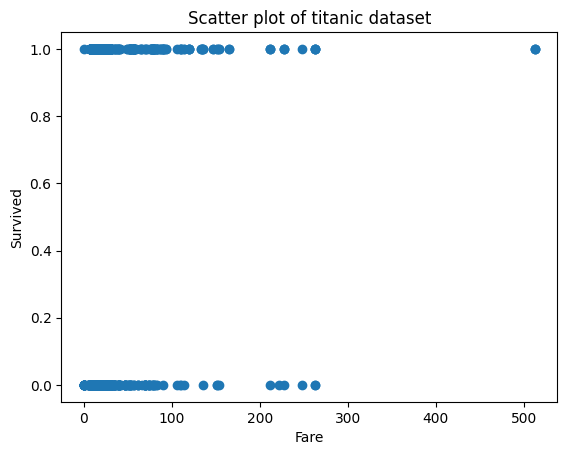

In [42]:
import matplotlib.pyplot as plt

plt.scatter(titanic["fare"], titanic["survived"])
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Scatter plot of titanic dataset")
plt.show()

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6330532212885154


# Decision Tree

In [44]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.drop(
    ["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"],
    axis="columns",
    inplace=True,
)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [46]:
inputs = df.drop("Survived", axis="columns")
target = df.Survived
inputs.Sex = inputs.Sex.map({"male": 1, "female": 2})
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [47]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)
print(len(X_train))
print(len(X_test))

712
179


In [49]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
model.score(X_test,y_test)

0.7988826815642458